In [1]:
import os
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
from matplotlib import pyplot as pl
%matplotlib inline

In [2]:
total_data=np.zeros((19000,1),dtype=object)
total_data_class=np.zeros((19000,20),dtype=float)

In [3]:
data_storage1=np.zeros((20,14),dtype=float)

In [4]:
events={('AVALANCHES',1):['avalanche','avalanches'],('AVIATION_HAZARD',2):['plane', 'wreckage', 'pilot', 'aviation', 'helicopter', 'aircraft', 'flight'],('ARMED_CONFLICTS',3):['conflict', 'militia', 'militant', 'attack', 'armed', 'fight', 'atrocities', 'weapon',  'war', 'gun', 'arms', 'killing'],
       ('CLIMATE_CHANGE',4):['climate', 'environment', 'carbon', 'heat wave', 'cold wave', 'temperature'],('DISEASE_OUTBREAK',5):['disease', 'epidemic', 'pandemic', 'outbreak', 'spread', 'health', 'virus'],
       ('EARTHQUAKE',6):['earthquake', 'seismic', 'magnitude', 'epicenter', 'tremor', 'aftershock', 'mainshock', 'quake'],('FIRE',7):['fire', 'forest fire', 'blaze', 'burn'],
       ('FLOOD',8):['flood', 'rain','flooding'],('INDUSTRIAL_ACCIDENT',9):['worker','killed','killing','accident','injure','injuring','injured','industry','industries'],('LANDSLIDE',10):['landslide', 'rock fall', 'buried', 'rubble'],('NORMAL_BOMBING',11):['bomb', 'explosive','explosion','bombing'],('RIOTS',12):['riot','riots'],
       ('STORM',13):['storm','storms','tornado','hurricane','cyclone','blizzard','hailstorm'],('SHOOT_OUT',14):['shoot-out','shoot_out','shoot','firing','shooting'],('SURGICAL-STRIKES',15):['surgical-strike','army','attack'],('TERRORIST_ATTACK',16):['terrorist','attack','suicide_attack','terrorists'],('TRANSPORT_HAZARD',17):['collision','accidents','accident','crash','crashed','collided'],('TSUNAMI',18):['tsunami','tsunamis'],('VOLCANO',19):['volcano','volcanoes','erruption','errupted','errupt']}

In [5]:
event_space=['Avalanches','Aviation_Hazard','Armed_conflicts','Climate_change','Disease_outbreak','Earthquake','Fire','Flood','Industrial_accident','Landslide','Normal_Bombing','Riots','Storm','Shoot_out','Surgical_strikes','Terrorist_Attack','Transportation_Haazard','Tsunami','Volcano']

In [6]:
def Convert(lst): 
    res_dct = {lst[i]: 0 for i in range(0, len(lst))} 
    return res_dct 

In [7]:
folders=os.listdir('data/english-corpus')
k=0
for i,folder in enumerate(folders):
    files=os.listdir('data/english-corpus/'+folder)
    print(i)
    for file in files:
        
        with open('data/english-corpus/'+folder+'/'+file, "r" ,errors='ignore') as f:
            data=f.read().lower()
            data=data.split('\n')
            data='.'.join(data)
            total_data[k]=data
            ##################################################################################################
            ##CHECKING THE CLASS
            words=data.split()
            
            for event,keywords in events.items():
                dict_keywords=Convert(keywords)
                for word in words:
                    try:
                        dict_keywords[word]=dict_keywords[word]+1
                    except:
                        continue
                count=sum(dict_keywords.values())
                if(count>=3):
                    total_data_class[k][event[1]-1]=1
                elif(event[1]==14 and count>1):
                    total_data_class[k][event[1]-1]=1
            #####################################################################################################
            if(np.sum(total_data_class[k])==0):
                #print(total_data_class[k])
                total_data_class[k,19]=1
            k=k+1
            #print(data)
##############################################################################################
for i in range(0,np.shape(total_data)[0]):
    if(total_data[i]==0):
        print(i)
        total_data=total_data[:i]
        total_data_class=total_data_class[:i]
        break
##############################################################################################
for i in range(0,20):
    print(i,'---->>',np.count_nonzero(total_data_class[:,i]))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
18189
0 ---->> 201
1 ---->> 1415
2 ---->> 2912
3 ---->> 1079
4 ---->> 1156
5 ---->> 1698
6 ---->> 547
7 ---->> 824
8 ---->> 3102
9 ---->> 271
10 ---->> 612
11 ---->> 349
12 ---->> 998
13 ---->> 679
14 ---->> 800
15 ---->> 981
16 ---->> 1385
17 ---->> 506
18 ---->> 383
19 ---->> 5382


In [8]:
total_files_scrapped=np.zeros((19,1))
for i in range(0,19):
    print(event_space[i],'---->>',np.count_nonzero(total_data_class[:,i]))
    total_files_scrapped[i,0]=np.count_nonzero(total_data_class[:,i])


Avalanches ---->> 201
Aviation_Hazard ---->> 1415
Armed_conflicts ---->> 2912
Climate_change ---->> 1079
Disease_outbreak ---->> 1156
Earthquake ---->> 1698
Fire ---->> 547
Flood ---->> 824
Industrial_accident ---->> 3102
Landslide ---->> 271
Normal_Bombing ---->> 612
Riots ---->> 349
Storm ---->> 998
Shoot_out ---->> 679
Surgical_strikes ---->> 800
Terrorist_Attack ---->> 981
Transportation_Haazard ---->> 1385
Tsunami ---->> 506
Volcano ---->> 383


In [35]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model
from tensorflow.keras import backend as K
from keras.utils import to_categorical
from keras import optimizers
import tensorflow as tf

In [10]:
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

# Use char_dict to replace the tk.word_index
tk.word_index = char_dict.copy()
# Add 'UNK' to the vocabulary
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

In [11]:
train_texts=total_data

In [12]:
sequence=tk.texts_to_sequences(train_texts.ravel())

In [13]:
train_data = pad_sequences(sequence, maxlen=2000, padding='post')    

In [14]:
train_data=np.array(train_data)

In [15]:
train_classes = total_data_class
print(total_data_class[14561])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [16]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [40]:
def create_execute_model(opt,drop_out):
#     K.clear_session()
    input_size = 2000
    vocab_size = len(tk.word_index)
    embedding_size = 69
    conv_layers = [[256, 7, 3],
                   [256, 7, 3],
                   [256, 3, -1],
                   [256, 3, -1],
                   [256, 3, -1],
                   [256, 3, 3]]

    fully_connected_layers = [1024, 1024]
    num_of_classes = 20
    dropout_p = drop_out
    optimizer = opt
    loss = 'binary_crossentropy'

    # Embedding weights
    embedding_weights = []  # (70, 69)
    embedding_weights.append(np.zeros(vocab_size))  # (0, 69)

    for char, i in tk.word_index.items():  # from index 1 to 69
        onehot = np.zeros(vocab_size)
        onehot[i - 1] = 1
        embedding_weights.append(onehot)

    embedding_weights = np.array(embedding_weights)
    print('Load')

    # Embedding layer Initialization
    embedding_layer = Embedding(vocab_size + 1,
                                embedding_size,
                                input_length=input_size,
                                weights=[embedding_weights])

    # Model Construction
    # Input
    inputs = Input(shape=(input_size,), name='input', dtype='int64')  # shape=(?, 2000)
    # Embedding
    x = embedding_layer(inputs)
    # Conv
    for filter_num, filter_size, pooling_size in conv_layers:
        x = Conv1D(filter_num, filter_size)(x)
        x = Activation('relu')(x)
        if pooling_size != -1:
            x = MaxPooling1D(pool_size=pooling_size)(x)  
    x = Flatten()(x)  # (None, 8704)
    # Fully connected layers
    for dense_size in fully_connected_layers:
        x = Dense(dense_size, activation='relu')(x)  # dense_size == 1024
        x = Dropout(dropout_p)(x)
    # Output Layer
    predictions = Dense(num_of_classes, activation='sigmoid')(x)
    # Build model
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer=optimizer, loss=loss, metrics=['categorical_accuracy',recall_m,precision_m,f1_m])  # Adam, binary_crossentropy
#     model.summary()
    return model



In [18]:
# Shuffle
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)
ind1=int(len(indices)*0.75)
x_train = train_data[indices[:17000]]
y_train = train_classes[indices[:17000]]

x_val = train_data[indices[17000:]]
y_val = train_classes[indices[17000:]]

# Training
print(ind1)
print(len(x_train),len(y_train))
print(len(x_val),len(y_val))

13641
17000 17000
1189 1189


In [19]:
def run_model(model,x_train,y_train,x_val,y_val):
    model.fit(x_train, y_train,
                  validation_data=(x_val, y_val),
                  batch_size=128,
                  epochs=20,
                  verbose=1)
    return model

In [20]:
import xml.etree.ElementTree as ET 
def xml_parser(path) :
    #Parsing XML Data
    event_dict = {} 
    arg_dict = {}
    event_list = ['NATURAL_EVENT','MAN_MADE_EVENT']
    arg_list = ['NATURAL_EVENT','MAN_MADE_EVENT','TIME-ARG','PLACE-ARG','PARTICIPANT-ARG', 'EPICENTRE-ARG', 'INTENSITY-ARG', 'MAGNITUDE-ARG', 'AFTER_EFFECTS-ARG','CASUALTIES-ARG','REASON-ARG'] 
    #arg_list = ['NATURAL_EVENT','MAN_MADE_EVENT','TIME-ARG','PLACE-ARG','PARTICIPANT-ARG','AFTER_EFFECTS-ARG','CASUALTIES-ARG','REASON-ARG'] 
    count = {}
    sent = []
    tags = {}
    doc_events = {}
    
    
    import os
    for file in os.listdir(path): 
        
        #print("-------------------------------------------------------------------------------") 
        filename = path + file 
        sent.append(get_text(filename))
        #full_text.append(''.join(sentence_split(filename)))
        tree = ET.parse(filename)
        root = tree.getroot()

        
        for tag in event_list: 
            for event in tree.iter(tag): 
                text = ''

                for i in range(len(event)):
                    if type(event[i].text) == str: 
                            text += event[i].text 

                    if event[i].tag in event_list:
                        for j in range(len(event[i])):
                            if type(event[i][j].text) == str: 
                                text += event[i][j].text
                #print('------------yoyo-----------------')            


                if tag == 'NATURAL_EVENT' or tag == 'MAN_MADE_EVENT':
                    #key = event id - filename
                    
                    label = event.attrib['TYPE']
                    if label == 'CYCLONE' or label == 'BLIZZARD' or label == 'TORNADO' or label == 'HURRICANE' or label == 'HAIL_STORMS' or label == 'STORM':
                        label = 'STORM'
                    if label == 'SEISMIC_RISK':
                        label = "Earthquake"
                    if label == 'ROCK_FALL':
                        label ='LAND_SLIDE'
                    if label == 'FOREST_FIRE':
                        label = 'FIRE'
                    if label == 'AVALANCHES':
                        label = 'LAND_SLIDE'
                    if label == 'ACCIDENTS' or label == 'VEHICULAR_COLLISION' or label == 'TRAIN_COLLISION':
                        label = 'TRANSPORT_HAZARDS'
                    if label == 'SUICIDE_ATTACK':
                        label ='TERRORIST_ATTACK'
                    if label == 'CRIME' or label == 'LIMNIC_ERRUPTIONS' or label == 'FAMINE' or label == 'HEAVY_RAINFALL' or label =='DROUGHT':
                        label ='MISCELLANEOUS'
                    if label == 'HEAT_WAVE' or label == 'COLD_WAVE':
                        label = 'CLIMATE_CHANGE'
                    if label == 'EPIDEMIC' or label == 'PANDEMIC' :
                        label = 'DISEASE_OUTBREAK'
                    
                    event_dict[event.attrib['ID'] + '-' + file ] = (label, text)
                
                    if file not in doc_events:
                        doc_events[file] = [label]
                    else:
                        if label not in doc_events[file]:
                            doc_events[file].append(label)
                            
            
    
        try:
            for type_ in list(set(doc_events[file])):
                if type_ not in count:
                    count[type_] = 1
                else:
                    count[type_] = count[type_] + 1
        except:
            print(file)
            continue
            
        '''try:
            print(doc_events[file])
        except:
            continue
        '''
                    
        
        tagged = []
        for child in root:

            for child1 in child:
                link = ''
                text = ''

                if child1.text != None:
                    tagged.append(('O', child1.text.strip())) 

                if child1.tag in arg_list:
                    for child2 in child1:

                        if child2.tag == 'LINK' :
                            link = child2.attrib['EVENT_ARG']   #the id of the event it is linked to
                            tag = child1.tag
                            begin_flag = 0
                            continue

                        elif child2.tag == 'ASSOCIATED-EVENT-LINK':
                            link = child2.attrib['EVENT_ID']
                            #print('yo', file)
                            tag = 'REASON-ARG'
                            begin_flag = 0
                            continue
                            
                        elif child1.tag in event_list and child2.text != None and link == '':
                            tagged.append(('O', child2.text.strip()))   #events

                        if link != '' :
                            try:

                                text = text + child2.text
                                
                                #key = arg id - filename
                                arg_dict[child1.attrib['ID'] + '-' + file] = (link, tag, text)    
                                
                                #BIO tagging
                                if begin_flag == 0 :
                                    tagged.append(('B' + '_' + tag + '__' + event_dict[link + '-' + file][0] + '__' + event_dict[link + '-' + file][1].strip(), child2.text.strip()))
                                    begin_flag = 1
                                
                                else :
                                    tagged.append(('I' + '_' + tag + '__' + event_dict[link + '-' + file][0] + '__' + event_dict[link + '-' + file][1].strip() , child2.text.strip()))
                            
                            
                            except:
                                continue
                       
        tags[file] = tagged
        
    
    total = {}
    fault = []
    for k, v in arg_dict.items():
        #key = event id + arg id + filename
        key = v[0] + '-' + k.split('-')[0] + '-' + k.split('-')[1]
        total[key] = {}
        try:
            total[key]['event_type'] = event_dict[v[0] + '-' + k.split('-')[1]][0]
            total[key]['event_trigger'] = event_dict[v[0] + '-' + k.split('-')[1]][1]
            total[key]['arg_type'] = v[1]
            total[key]['arg_trigger'] = v[2]
        except:
            fault.append((v[0] + '-' + k.split('-')[1]))
            
    #print('FAULTS:', fault)
            
            
    print(count)
    return tags, doc_events, count

In [21]:
from lxml import etree
def get_text(filename):
    
    tree = etree.parse(filename)
    notags = etree.tostring(tree, encoding='unicode', method='text')
    
    return notags

In [22]:
test_data=np.zeros((206,1),dtype=object)
total_count=0
doc,a,b=xml_parser("English/Test/")
i=0
for file_name,d in doc.items():
    total_count=total_count+1
    text=""
    for x in d:
        text=text+" "+x[1]
    test_data[i]=text
    
    i=i+1
doc,a,b=xml_parser("English/Train/")
i=0
for file_name,d in doc.items():
    
    total_count=total_count+1
    text=""
    for x in d:
        text=text+" "+x[1]
    test_data=np.append(test_data,np.array([[text]]),axis=0)
    
        
    

{'TRANSPORT_HAZARDS': 116, 'STORM': 5, 'SHOOT_OUT': 8, 'FIRE': 20, 'MISCELLANEOUS': 32, 'NORMAL_BOMBING': 6, 'CLIMATE_CHANGE': 2, 'EARTHQUAKE': 11, 'TSUNAMI': 1, 'SURGICAL_STRIKES': 3, 'INDUSTRIAL_ACCIDENT': 4, 'AVIATION_HAZARD': 5, 'RIOTS': 1, 'TERRORIST_ATTACK': 1, 'LAND_SLIDE': 2, 'ARMED_CONFLICTS': 1}
{'FIRE': 129, 'TRANSPORT_HAZARDS': 370, 'MISCELLANEOUS': 42, 'SHOOT_OUT': 66, 'EARTHQUAKE': 53, 'STORM': 55, 'TERRORIST_ATTACK': 38, 'CLIMATE_CHANGE': 12, 'FLOODS': 42, 'SURGICAL_STRIKES': 23, 'NORMAL_BOMBING': 34, 'INDUSTRIAL_ACCIDENT': 20, 'VOLCANO': 17, 'ARMED_CONFLICTS': 3, 'TSUNAMI': 4, 'LAND_SLIDE': 34, 'AVIATION_HAZARD': 14, 'DISEASE_OUTBREAK': 4, 'RIOTS': 3}


In [23]:
Test_data_classes=np.zeros((len(test_data),20),dtype=float)
for i in range(0,len(test_data)):
    count=0
    words=test_data[i][0].split()

    for event,keywords in events.items():
        dict_keywords=Convert(keywords)
        for word in words:
            try:
                dict_keywords[word]=dict_keywords[word]+1
            except:
                continue
        count=sum(dict_keywords.values())
        if(count>=2):
            Test_data_classes[i][event[1]-1]=1
        elif(event[1]==14 and count>1):
            Test_data_classes[i][event[1]-1]=1
    #####################################################################################################
    if(np.sum(Test_data_classes[i])==0):
        #print(total_data_class[i])
        Test_data_classes[i,19]=1

for i in range(0,20):
    print(i,'---->>',np.count_nonzero(Test_data_classes[:,i]))
    
    

0 ---->> 9
1 ---->> 25
2 ---->> 70
3 ---->> 5
4 ---->> 23
5 ---->> 59
6 ---->> 178
7 ---->> 25
8 ---->> 624
9 ---->> 14
10 ---->> 35
11 ---->> 1
12 ---->> 43
13 ---->> 20
14 ---->> 37
15 ---->> 36
16 ---->> 289
17 ---->> 10
18 ---->> 10
19 ---->> 173


In [24]:
sequence2=tk.texts_to_sequences(test_data.ravel())

In [25]:
Test_data = pad_sequences(sequence2, maxlen=2000, padding='post')    

In [26]:
Test_data=np.array(Test_data)

In [27]:
Test_classes = Test_data_classes

In [28]:
def metrics_evaluation(model,i,Test_data,Test_classes,x_val,y_val,x_train,y_train,drp,lri):
    val1=model.evaluate(Test_data,Test_classes,verbose=1)
    val2=model.evaluate(x_val,y_val,verbose=1)
    val3=model.evaluate(x_train,y_train,verbose=1)

    val1=np.reshape(val1,(5,1)).T
    val2=np.reshape(val2,(5,1)).T
    val3=np.reshape(val3,(5,1)).T
    val=np.concatenate((val1[:,1:],val2[:,1:],val3[:,1:]),axis=1)
    data_storage1[i,0]=lri
    data_storage1[i,1]=drp
    data_storage1[i,2:]=val
    

In [41]:
def total_evaluation():
    learning=[0.0008,0.001,0.002,0.003,0.004]
    drp_ot=[0.3,0.4,0.5,0.6]
    i=0
    for lri in learning:
        for drp in drp_ot:
            print(lri)
            model=create_execute_model(optimizers.Adam(lr=lri, beta_1=0.9, beta_2=0.999, amsgrad=False),drp)
            model=run_model(model,x_train,y_train,x_val,y_val)
            metrics_evaluation(model,i,Test_data,Test_classes,x_val,y_val,x_train,y_train,drp,lri)
            print('-------------'+str(i)+'---------------')
            i=i+1
            K.clear_session()
            
            
            
            
            

In [42]:
total_evaluation()

0.0008
Load


ValueError: Fetch argument <tf.Variable 'embedding_1/embeddings:0' shape=(70, 69) dtype=float32_ref> cannot be interpreted as a Tensor. (Tensor Tensor("embedding_1/embeddings:0", shape=(70, 69), dtype=float32_ref) is not an element of this graph.)

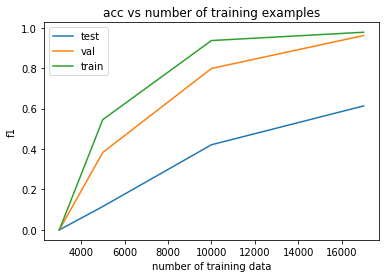

In [129]:
pl.plot(data_storage1[:,0],data_storage1[:,4], label='test')
pl.plot( data_storage1[:,0],data_storage1[:,8], label='val')
pl.plot( data_storage1[:,0],data_storage1[:,12], label='train')
pl.xlabel('number of training data')
pl.ylabel('f1')
pl.title('f1 vs dropout')
pl.legend()
pl.savefig('f1.png')
pl.show()

In [60]:
def perlabel_accuracy(y,yp):
    graph=np.zeros((19,5),dtype=float)
    for col in range (0,19):
        metriccount=[0,0,0,0]
        trc=y[:,col]
        tec=yp[:,col]
        for i in range(0,len(y)):
            if(trc[i]==1.0 and tec[i]==1.0):
                metriccount[0]=metriccount[0]+1
            if(trc[i]==0.0 and tec[i]==0.0):
                metriccount[1]=metriccount[1]+1
            if(trc[i]==0.0 and tec[i]==1.0):
                metriccount[2]=metriccount[2]+1
            if(trc[i]==1.0 and tec[i]==0.0):
                metriccount[3]=metriccount[3]+1
        try:
            acc=(metriccount[0]+metriccount[1])/(metriccount[0]+metriccount[1]+metriccount[2]+metriccount[3])
        except:
            acc=0
        try:
            recall=metriccount[0]/(metriccount[0]+metriccount[3])
        except:
            recall=0
        try:
            precision=metriccount[0]/(metriccount[0]+metriccount[2])
        except:
            precison=0
        try:
            f1=2*recall*precision/(recall+precision)
        except:
            f1=0
        graph[col,0]=acc
        graph[col,1]=recall
        graph[col,2]=precision
        graph[col,3]=f1
        graph[col,4]=total_files_scrapped[col,0]
        print(event_space[col]+'-->'+'acc:'+str(acc)+'--'+'recall:'+str(recall)+'--'+'precision:'+str(precision)+'--'+'f1:'+str(f1))
            
    return graph        

In [61]:
yp1=model.predict(Test_data)
yp1[yp1>=0.5]=1.0
yp1[yp1<0.5]=0.0
graph=perlabel_accuracy(Test_data_classes,yp1)

Avalanches-->acc:0.9932301740812379--recall:0.2222222222222222--precision:1.0--f1:0.3636363636363636
Aviation_Hazard-->acc:0.9835589941972921--recall:0.76--precision:0.6333333333333333--f1:0.6909090909090909
Armed_conflicts-->acc:0.9574468085106383--recall:0.5428571428571428--precision:0.76--f1:0.6333333333333332
Climate_change-->acc:0.9961315280464217--recall:0.4--precision:0.6666666666666666--f1:0.5
Disease_outbreak-->acc:0.9777562862669246--recall:0.13043478260869565--precision:0.5--f1:0.20689655172413793
Earthquake-->acc:0.9816247582205029--recall:0.711864406779661--precision:0.9545454545454546--f1:0.8155339805825244
Fire-->acc:0.7911025145067698--recall:0.16853932584269662--precision:0.30612244897959184--f1:0.2173913043478261
Flood-->acc:0.971953578336557--recall:0.4--precision:0.4166666666666667--f1:0.4081632653061225
Industrial_accident-->acc:0.7572533849129593--recall:0.6282051282051282--precision:0.9537712895377128--f1:0.7574879227053141
Landslide-->acc:0.9680851063829787--rec

In [62]:
for i in range(0,19):
    if(Test_data_classes[11,i]==1.0):
        print('original  '+event_space[i]+'--'+'Yes')
    else:
        print('original  '+event_space[i]+'--'+'No')
    if(yp1[11,i]==1.0):
        print('Predicted  '+event_space[i]+'--'+'Yes')
    else:
        print('predicted  '+event_space[i]+'--'+'No')

original  Avalanches--No
predicted  Avalanches--No
original  Aviation_Hazard--No
predicted  Aviation_Hazard--No
original  Armed_conflicts--No
predicted  Armed_conflicts--No
original  Climate_change--No
predicted  Climate_change--No
original  Disease_outbreak--No
predicted  Disease_outbreak--No
original  Earthquake--No
predicted  Earthquake--No
original  Fire--No
predicted  Fire--No
original  Flood--No
predicted  Flood--No
original  Industrial_accident--Yes
Predicted  Industrial_accident--Yes
original  Landslide--No
predicted  Landslide--No
original  Normal_Bombing--No
predicted  Normal_Bombing--No
original  Riots--No
predicted  Riots--No
original  Storm--No
predicted  Storm--No
original  Shoot_out--No
predicted  Shoot_out--No
original  Surgical_strikes--No
predicted  Surgical_strikes--No
original  Terrorist_Attack--No
predicted  Terrorist_Attack--No
original  Transportation_Haazard--Yes
predicted  Transportation_Haazard--No
original  Tsunami--No
predicted  Tsunami--No
original  Volcano

In [69]:
np.savetxt("graph.csv", graph, delimiter=",")

In [68]:
graph[:,4]

array([ 201., 1415., 2912., 1079., 1156., 1698.,  547.,  824., 3102.,
        271.,  612.,  349.,  998.,  679.,  800.,  981., 1385.,  506.,
        383.])

Hyperparameter tuning(f1 score)
graphs (number of documents(even for validation) vs metrics, multiclass classification)